<a href="https://colab.research.google.com/github/Ms-Gichuhi/Financial-inclusion-in-africa-project/blob/master/Copy_of_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.**Defining the question**


> a) Specifying the Data Analytic Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


> b) Defining the Metric for Success

What are the factors affecting the ability of one to have a bank account in the given african regions?


> c) Understanding the context


> d) Recording the Experimental Design


> e) Data Relevance












# 2. Reading the Data

In [188]:
# Loading the Data from the source i.e. csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

financial_df = pd.read_csv("Financial_dataset.csv")

var_definations = pd.read_csv("VariableDefinitions.csv")

# 3. Checking the Data

In [82]:
# Determining the no. of records in our dataset

financial_df.shape

(23524, 13)

In [83]:
# Previewing the top of our dataset

financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [84]:
# Previewing the bottom of our dataset
 
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [85]:
#previewing our definations dataset
var_definations

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [86]:
# Checking whether each column has an appropriate datatype

financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [87]:
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# 4. Tidying the Dataset

In [189]:
#renaning the column 
fin_cols = ['country', 'year', 'uniqueid', 'bank_account', 'location_type', 'phone_access', 'household_size', 'respondent_age', 'gender', 'relationship_with_head',
            'marital_status', 'education_level', 'job_type']

financial_df.columns = fin_cols    
financial_df.head()       

,country,year,uniqueid,bank_account,location_type,phone_access,household_size,respondent_age,gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


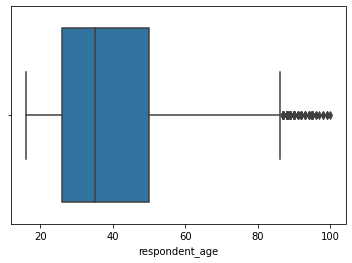

In [ ]:
# Checking for Outliers

sns.boxplot(x=financial_df['respondent_age'])


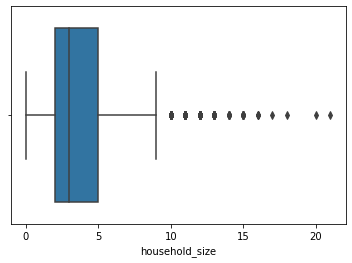

In [185]:
sns.boxplot(x=financial_df['household_size'])
# the outliers found in the household size and age are normal

In [127]:
# Dealing with the Missing Data

financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
bank_account              36
location_type             15
phone_access              11
household_size            28
respondent_age            34
gender                    34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [190]:
# Dealing with the Missing Data
# dropping the missing values since they are not significant
financial_df.dropna(axis=0, inplace=True)

In [191]:
# More data cleaning procedures
# dropping columns that we won't use
financial_df.drop(['uniqueid'], axis=1, inplace=True)

#financial_df.columns

In [92]:
financial_df.head()


,country,year,bank_account,location_type,phone_access,household_size,respondent_age,gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 6. Exploratory Analysis







univariate analysis

In [51]:
#measure of central tendancy
financial_df["household_size"].mean()

3.6818181818181817

In [52]:
financial_df["respondent_age"].mean()

38.804299702000854

In [ ]:
financial_df["household_size"].mode()


0    2.0
dtype: float64

In [ ]:
financial_df["respondent_age"].mode()

0    30.0
dtype: float64

In [ ]:
financial_df["gender"].mode()

0    Female
dtype: object

In [ ]:
financial_df["bank_account"].mode()

0    No
dtype: object

In [ ]:
financial_df["marital_status"].mode()

0    Married/Living together
dtype: object

measures of dispersion

In [ ]:
# variance for age of respondent
financial_df["respondent_age"].var()

272.9102714347262

In [ ]:
financial_df["household_size"].var()

5.198096306757275

In [ ]:
#finding range of household size
max_household = financial_df.household_size.max()
min_household = financial_df.household_size.min()
household_range = max_household - min_household
household_range

21.0

In [ ]:
#finding range of Age of respondent
max_age = financial_df.respondent_age.max()
min_age = financial_df.respondent_age.min()
age_range = max_age - min_age
age_range

84.0

In [48]:
financial_df["respondent_age"].skew()

0.8418012375387167

In [49]:
financial_df["household_size"].skew()

0.977652354434429

In [50]:
financial_df.kurt()

city              165.195071
household_size      1.158154
respondent_age      0.101108
dtype: float64

In [53]:
financial_df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [54]:
financial_df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [57]:
financial_df.household_size.value_counts()

2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [58]:
financial_df.respondent_age.value_counts()

30.0     1052
35.0      834
25.0      790
28.0      747
32.0      714
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: respondent_age, Length: 85, dtype: int64

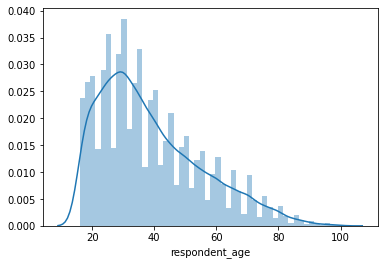

In [59]:
#plotting a histogram for the distribution  of respondents age
sns.distplot(financial_df['respondent_age'], kde=True)

Bivariate analysis

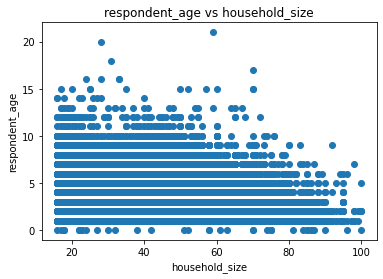

In [60]:
#plotting a scatter plot of age vs household size

plt.scatter(financial_df["respondent_age"],financial_df["household_size"])
plt.title("respondent_age vs household_size")
plt.xlabel("household_size")
plt.ylabel("respondent_age")
plt.show()


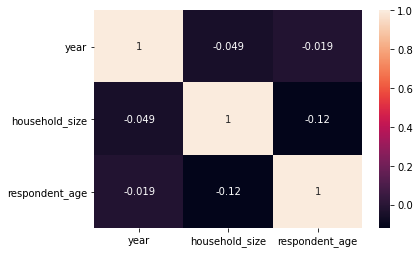

In [95]:
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'holders and non-holders of bank accounts per country')

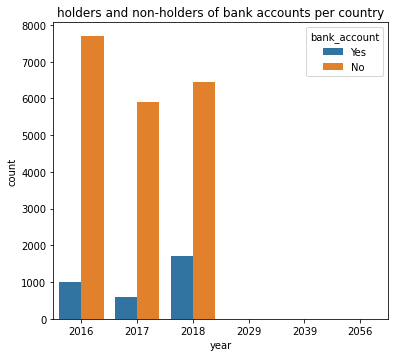

In [192]:
#plotting a bar graph between years and bank account

plt.figure(figsize = [6, 12])
plt.subplot(212)
sns.countplot(x = 'year', hue = 'bank_account', data = financial_df)
plt.title('holders and non-holders of bank accounts per country')

Text(0.5, 1.0, 'holders and non-holders of bank accounts per country')

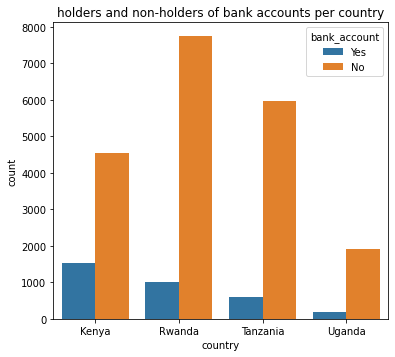

In [64]:
#plotting country's number of people with or without bank accounts based on the samples taken
plt.figure(figsize = [6, 12])
plt.subplot(212)
sns.countplot(x = 'country', hue = 'bank_account', data = financial_df)
plt.title('holders and non-holders of bank accounts per country')

Text(0.5, 1.0, 'bank accounts based on location type')

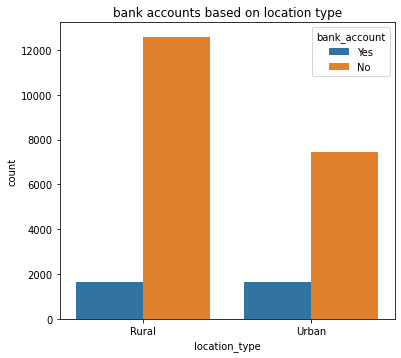

In [193]:
#plotting bank accounts in the different location types
plt.figure(figsize = [6, 12])
plt.subplot(212)
sns.countplot(x = 'location_type', hue = 'bank_account', data = financial_df)
plt.title('bank accounts based on location type')



Text(0.5, 1.0, 'bank accounts vs gender')

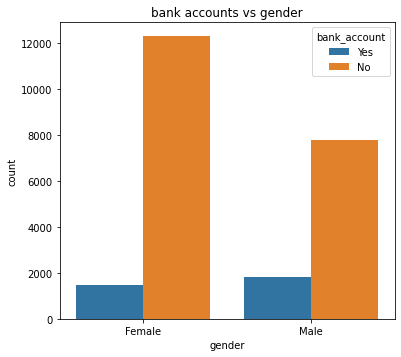

In [94]:
#plotting nank accounts per gender
plt.figure(figsize = [6, 12])
plt.subplot(212)
sns.countplot(x = 'gender', hue = 'bank_account', data = financial_df)
plt.title('bank accounts vs gender')


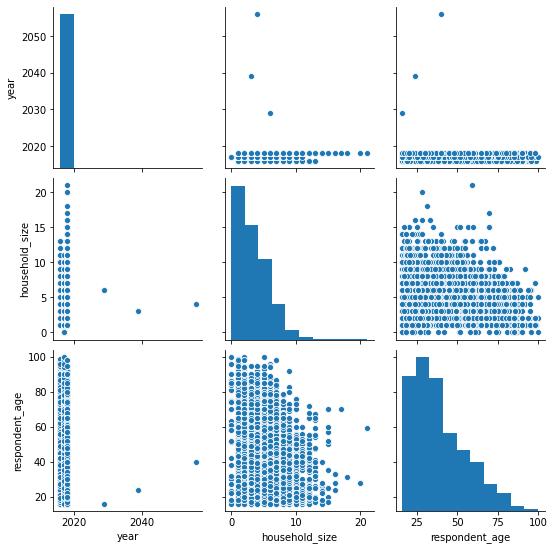

In [97]:
sns.pairplot(financial_df)

Multivariate analysis


In [149]:
financial_df.head()

,country,year,bank_account,location_type,phone_access,household_size,respondent_age,gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [150]:
financial_df.drop(['country','year','marital_status','education_level', 'relationship_with_head','job_type'],axis=1,inplace=True)


In [151]:
financial_df['phone_access'] = financial_df.phone_access.map({'No': 0, 'Yes': 1})
financial_df.head()


,bank_account,location_type,phone_access,household_size,respondent_age,gender
0,Yes,Rural,1,3.0,24.0,Female
1,No,Rural,0,5.0,70.0,Female
2,Yes,Urban,1,5.0,26.0,Male
3,No,Rural,1,5.0,34.0,Female
4,No,Urban,0,8.0,26.0,Male


In [152]:
financial_df['gender'] = financial_df.gender.map({'Female':0, 'Male':1})
financial_df.head()


,bank_account,location_type,phone_access,household_size,respondent_age,gender
0,Yes,Rural,1,3.0,24.0,0
1,No,Rural,0,5.0,70.0,0
2,Yes,Urban,1,5.0,26.0,1
3,No,Rural,1,5.0,34.0,0
4,No,Urban,0,8.0,26.0,1


In [153]:
financial_df['bank_account'] = financial_df.bank_account.map({'No':0, 'Yes':1})
financial_df.head()

,bank_account,location_type,phone_access,household_size,respondent_age,gender
0,1,Rural,1,3.0,24.0,0
1,0,Rural,0,5.0,70.0,0
2,1,Urban,1,5.0,26.0,1
3,0,Rural,1,5.0,34.0,0
4,0,Urban,0,8.0,26.0,1


In [154]:
financial_df['location_type'] = financial_df.location_type.map({'Urban':0, 'Rural':1})
financial_df.head()

,bank_account,location_type,phone_access,household_size,respondent_age,gender
0,1,1,1,3.0,24.0,0
1,0,1,0,5.0,70.0,0
2,1,0,1,5.0,26.0,1
3,0,1,1,5.0,34.0,0
4,0,0,0,8.0,26.0,1


Linear Discriminant Analysis

In [155]:
#dividing the dataset
x=financial_df.iloc[:,1:6].values
y=financial_df.iloc[:,0].values

In [161]:
#importing libriries to divide data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [162]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [163]:
#using the random forest classifier to evaluate the performance
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(max_depth=0.2, random_state=0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)



In [164]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# with linear discriminant method we have achieved an accuracy of 85% 

[[4008    0]
 [ 661    0]]
Accuracy0.8584279288926965


In [178]:
#pca

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [179]:
# Step 5: Normalization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

PCA

In [180]:
#applying PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [181]:
# finding the explained Variance Ratio

explained_variance=pca.explained_variance_ratio_
explained_variance


array([0.2699684 , 0.21867549, 0.20565232, 0.17017232, 0.13553147])

In [183]:
# Training 
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [184]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#the accuracy using PCA matches that of the discriminant analysis at 85% accuracy

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


1. The number of people who have a bank account are not affected by they location type or their Gender. though we notice that the opening of bank accounts has been increasing over the years with the lower age group having more bank accounts.

2. The demand for bank accounts will also be affected by the job type of the individuals and the level of education.